## Here in this notebook we are using IQR technique to Detect the outliers and remove the outlier ON SWKED DATA IT IS USED

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("placement.csv")

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


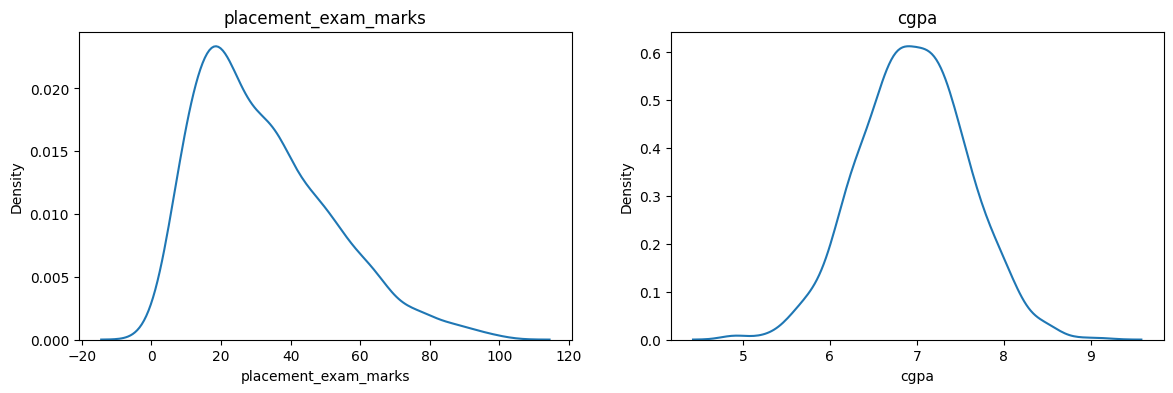

In [6]:
plt.figure(figsize =(14,4))

plt.subplot(121)
sns.kdeplot(df['placement_exam_marks'])
plt.title("placement_exam_marks")

plt.subplot(122)
sns.kdeplot(df['cgpa'])
plt.title("cgpa")

plt.show()

In [11]:
# placement_exam_marks is Swked on left side so we need to use the IQR technique to detect outlier and remove ot
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [12]:
Q1,Q3 #calculate the q1 and q3

(17.0, 44.0)

In [15]:
# now find the IQR
iqr = Q3-Q1
iqr

27.0

In [18]:
# calculate the upper and lower lim
low_lim = Q1 -1.5*iqr
high_lim = Q3 +1.5*iqr

low_lim,high_lim

(-23.5, 84.5)

In [33]:
# nows let's find out the outliers
df[(df['placement_exam_marks']>high_lim) | (df['placement_exam_marks']<low_lim)]

,cgpa,placement_exam_marks,placed


In [26]:
# okay now let's apply the trimming technique to drop the outliers
new_df = df[(df['placement_exam_marks']<high_lim) & (df['placement_exam_marks']>low_lim)]

In [28]:
new_df.shape

(985, 3)

In [31]:
# now let's replace the value with the Capping technique
df['placement_exam_marks']=np.where(df['placement_exam_marks']>high_lim , high_lim , 
        np.where(df['placement_exam_marks']<low_lim ,low_lim,
                df['placement_exam_marks']))

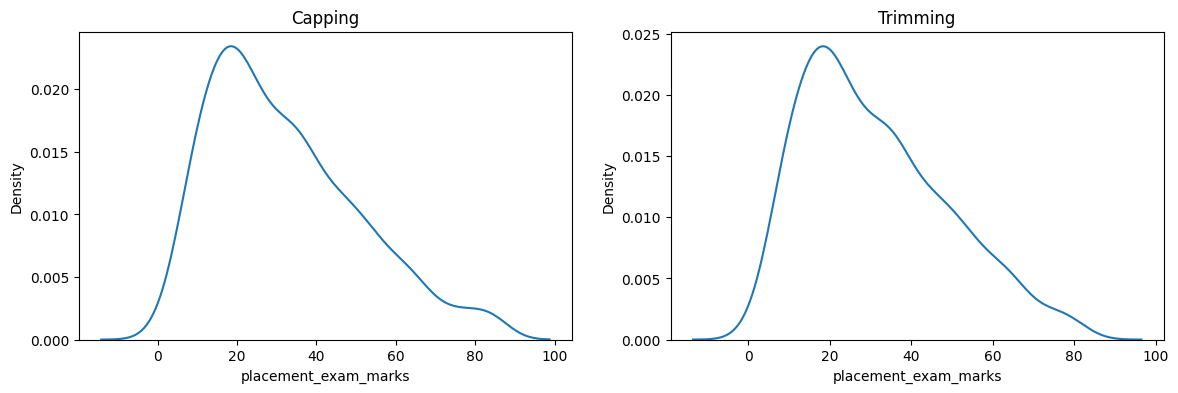

In [35]:
# let's compare the ditributin between capping and trimming
plt.figure(figsize=(14,4))
plt.subplot(121)

sns.kdeplot(df['placement_exam_marks'])
plt.title("Capping")

plt.subplot(122)
sns.kdeplot(new_df['placement_exam_marks'])
plt.title("Trimming")

plt.show()

In [37]:
X= df.drop(columns=['placed'])
y = df['placed']

In [39]:
# let's build a model and check the accuracy on both data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =4)


In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = log.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.445

In [47]:
# try a model on the new df dataframe
X= new_df.drop(columns=['placed'])
y = new_df['placed']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =4)

In [49]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.4619289340101523